# Question_5: Plot the distribution of delay times.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import src.data_processing.data as data

In [5]:
trips = data.full_trips

We see that the majority of stops do not experience delay times

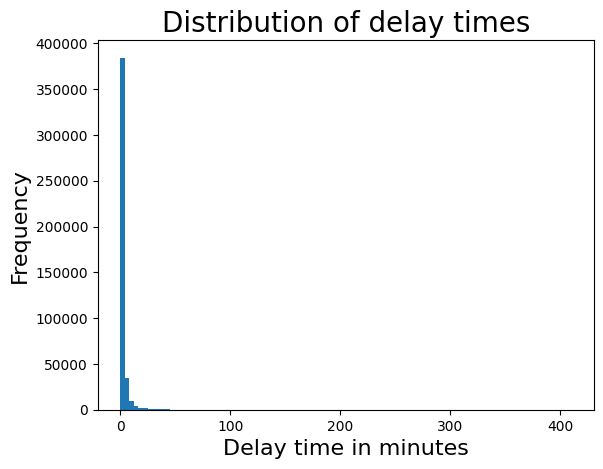

In [6]:
plt.hist(trips['Delay time']/60, bins=100, range = [0,410])
plt.xlabel('Delay time in minutes', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Distribution of delay times', fontsize = 20)

plt.show()

We take a delay time of 0 to 1 hour, as delays above 1 hour (relatively) hardly ever occur

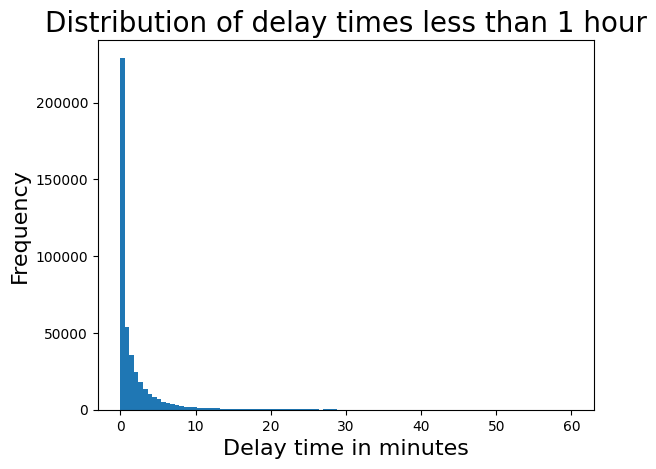

In [7]:
plt.hist(trips['Delay time']/60, bins=100, range=[0,60])
plt.xlabel('Delay time in minutes', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Distribution of delay times less than 1 hour', fontsize = 20)
plt.show()

We can also plot this cumulatively

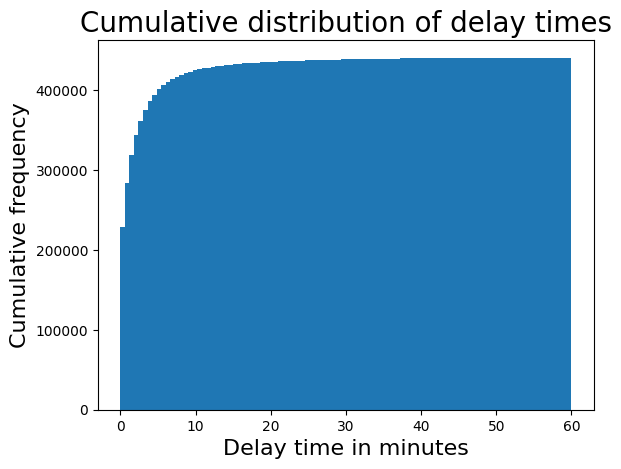

In [8]:
plt.hist(trips['Delay time']/60,cumulative=True , bins =100, range = [0,60])
plt.xlabel('Delay time in minutes', fontsize = 16)
plt.ylabel('Cumulative frequency', fontsize = 16)
plt.title('Cumulative distribution of delay times', fontsize = 20)
plt.show()

# From here on we will do some extra analysis

We can also see how our actual delay time is distributed i.e. changing our x-axis to ]0,60]

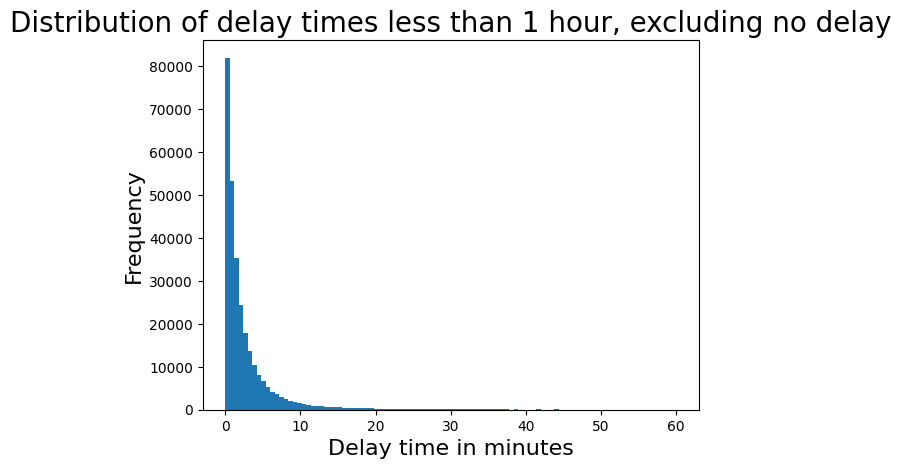

In [9]:
plt.hist(trips['Delay time']/60, bins=100, range=[0.0001,60])
plt.xlabel('Delay time in minutes', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Distribution of delay times less than 1 hour, excluding no delay', fontsize = 20)
plt.show()

75% of all our trips have a delay of around 2 minutes or less.

In [10]:
trips_min = trips["Delay time"]/60
trips_min.describe()

count    440943.000000
mean          2.048206
std           5.848505
min           0.000000
25%           0.000000
50%           0.516667
75%           2.050000
max         408.933333
Name: Delay time, dtype: float64

In [11]:
percentage_of_trips_with_delay_over_6_hours = trips[trips["Delay time"] > 360].groupby("Name of the stop").size().div(trips.groupby("Name of the stop").size()).mul(100).reset_index().rename(columns={0: "Percentage of trips with delay over 1 hours"})


In [12]:
percentage_of_trips_with_delay_over_6_hours

,Name of the stop,Percentage of trips with delay over 1 hours
0,aalst,7.686212
1,aalst-kerrebroek,1.428571
2,aalter,6.147860
3,aarschot,4.320000
4,aarsele,8.955224
...,...,...
622,zolder-kruissporen,7.373272
623,zonhoven,6.912442
624,zottegem,4.209446
625,zwijndrecht,5.804111


On average , 92% percent of trips have a delay less than an hour.

In [13]:
percentage_of_trips_with_delay_over_6_hours["Percentage of trips with delay over 1 hours"].mean()

8.051087518610787

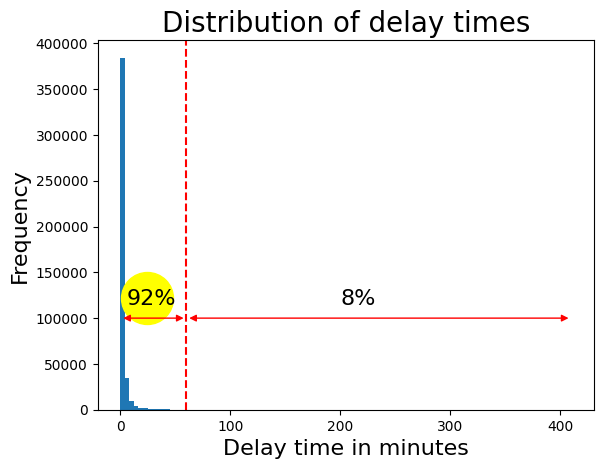

In [18]:
plt.hist(trips['Delay time']/60, bins=100, range = [0,410])
plt.xlabel('Delay time in minutes', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Distribution of delay times', fontsize = 20)
plt.axvline(x=60, color='r', linestyle='--')
plt.text(6, 115000, "92%", fontsize = 16)
plt.text(200, 115000, "8%", fontsize = 16)
plt.annotate('',
            xy=(60, 100000), xycoords='data',
            xytext=(0, 100000), textcoords='data',
            arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3", color = "red"),)
plt.annotate('',
            xy=(410, 100000), xycoords='data',
            xytext=(60, 100000), textcoords='data',
            arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3", color = "red"),
            )
plt.scatter(24, 122000, s = 1400, color = "yellow")
plt.show()